# UAS Machine Learning
Cetta Maulana A<br>
1103213119<br>
CIFAR10 ResNet18<br>
[canva Link!!](https://www.canva.com/design/DAGIq0upgpw/3sapuCSMZHSlf-bEIMRFQw/view?utm_content=DAGIq0upgpw&utm_campaign=designshare&utm_medium=link&utm_source=editor)<br>
[GPT Link!!](https://chatgpt.com/share/2a59690b-58c6-42f2-89d7-364985c2f2d2)

In [1]:
import pickle
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models, optimizers, losses, datasets
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D, Dense, BatchNormalization, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-06-20 12:11:04.838605: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


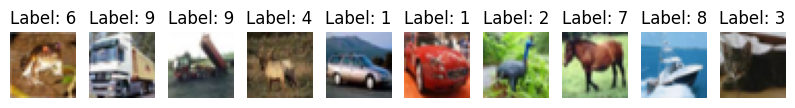

In [2]:
for i in range(1,6):
    path = 'data_batch_' + str(i)
    with open(path, mode='rb') as file:
        # note the encoding type is 'latin1'
        batch = pickle.load(file, encoding='latin1')
    if i == 1:  
        x_train = (batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)).astype('float32')
        y_train = batch['labels']
    else:
        x_train_temp = (batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)).astype('float32')
        y_train_temp = batch['labels']
        x_train = np.concatenate((x_train,x_train_temp),axis = 0)
        y_train = np.concatenate((y_train,y_train_temp),axis=0)

path = 'test_batch'
with open(path,'rb') as file:
    # note the encoding type is 'latin1'
    batch = pickle.load(file, encoding='latin1')
    x_test = (batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)).astype('float32')
    y_test = batch['labels']

x_train, x_test = x_train.astype('float32') / 255.0, x_test.astype('float32') / 255.0

plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_train[i])
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

# Data augmentation
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

y_train, y_test = tf.keras.utils.to_categorical(y_train, 10), tf.keras.utils.to_categorical(y_test, 10)


In [3]:
# Define the ResNet18 model
def resnet_block(inputs, filters, kernel_size, strides):
    x = layers.Conv2D(filters, kernel_size=kernel_size, strides=strides, padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Conv2D(filters, kernel_size=kernel_size, strides=1, padding='same')(x)
    x = layers.BatchNormalization()(x)

    if strides != 1 or inputs.shape[-1] != filters:
        inputs = layers.Conv2D(filters, kernel_size=1, strides=strides, padding='same')(inputs)
    
    x = layers.add([x, inputs])
    x = layers.ReLU()(x)
    return x

def build_resnet18(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, kernel_size=3, strides=1, padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = resnet_block(x, 64, 3, 1)
    x = resnet_block(x, 64, 3, 1)
    
    x = resnet_block(x, 128, 3, 2)
    x = resnet_block(x, 128, 3, 1)

    x = resnet_block(x, 256, 3, 2)
    x = resnet_block(x, 256, 3, 1)

    x = resnet_block(x, 512, 3, 2)
    x = resnet_block(x, 512, 3, 1)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, x)
    return model

# Model configuration
input_shape = (32, 32, 3)
num_classes = 10
model = build_resnet18(input_shape, num_classes)



2024-06-20 12:11:15.150471: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-20 12:11:15.162607: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-20 12:11:15.162682: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-20 12:11:15.165014: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-20 12:11:15.165112: I external/local_xla/xla/stream_executor

In [4]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 32, 32,    │      1,792 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 32, 32,    │        256 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu (ReLU)        │ (None, 32, 32,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 32, 32,    │     36,928 │ re_lu[0][0]       │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        256 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_1 (ReLU)      │ (None, 32, 32,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 32, 32,    │     36,928 │ re_lu_1[0][0]     │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        256 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 32, 32,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │ re_lu[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_2 (ReLU)      │ (None, 32, 32,    │          0 │ add[0][0]         │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 32, 32,    │     36,928 │ re_lu_2[0][0]     │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        256 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_3 (ReLU)      │ (None, 32, 32,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 32, 32,    │     36,928 │ re_lu_3[0][0]     │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        256 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 32, 32,    │          0 │ batch_normalizat

 Total params: 11,184,778 (42.67 MB)

 Trainable params: 11,176,970 (42.64 MB)

 Non-trainable params: 7,808 (30.50 KB)

In [5]:
# Train the model
epochs = 70
batch_size = 128

history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                    steps_per_epoch=len(x_train) // batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test),verbose = 1)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')
print(f'Test lost: {test_loss}')

Epoch 1/70


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1718885484.037354    4012 service.cc:145] XLA service 0x7fd258002900 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1718885484.037458    4012 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-06-20 12:11:24.322170: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-06-20 12:11:25.293086: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8906
I0000 00:00:171

117/390 ━━━━━━━━━━━━━━━━━━━━ 19s 72ms/step - accuracy: 0.3081 - loss: 2.1499

I0000 00:00:1718885507.014708    4146 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_5186', 8 bytes spill stores, 8 bytes spill loads



390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.4070 - loss: 1.7211

I0000 00:00:1718885536.249516    4232 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_504', 8 bytes spill stores, 8 bytes spill loads



390/390 ━━━━━━━━━━━━━━━━━━━━ 66s 118ms/step - accuracy: 0.4072 - loss: 1.7202 - val_accuracy: 0.4560 - val_loss: 1.5952
Epoch 2/70
  1/390 ━━━━━━━━━━━━━━━━━━━━ 27s 71ms/step - accuracy: 0.6328 - loss: 0.9827

2024-06-20 12:12:21.882079: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-20 12:12:21.882139: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
/usr/lib/python3.11/contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


390/390 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6328 - loss: 0.9827 - val_accuracy: 0.4389 - val_loss: 1.6391
Epoch 3/70
390/390 ━━━━━━━━━━━━━━━━━━━━ 31s 78ms/step - accuracy: 0.6751 - loss: 0.9089 - val_accuracy: 0.6847 - val_loss: 1.0144
Epoch 4/70
  1/390 ━━━━━━━━━━━━━━━━━━━━ 27s 70ms/step - accuracy: 0.7734 - loss: 0.7529

2024-06-20 12:12:55.321114: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-20 12:12:55.321316: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


390/390 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7734 - loss: 0.7529 - val_accuracy: 0.6843 - val_loss: 0.9849
Epoch 5/70
390/390 ━━━━━━━━━━━━━━━━━━━━ 31s 79ms/step - accuracy: 0.7603 - loss: 0.6908 - val_accuracy: 0.6546 - val_loss: 1.0755
Epoch 6/70
  1/390 ━━━━━━━━━━━━━━━━━━━━ 27s 70ms/step - accuracy: 0.8281 - loss: 0.5398

2024-06-20 12:13:28.883152: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-20 12:13:28.883283: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


390/390 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8281 - loss: 0.5398 - val_accuracy: 0.6530 - val_loss: 1.0998
Epoch 7/70
390/390 ━━━━━━━━━━━━━━━━━━━━ 31s 79ms/step - accuracy: 0.8002 - loss: 0.5745 - val_accuracy: 0.6164 - val_loss: 1.5691
Epoch 8/70
  1/390 ━━━━━━━━━━━━━━━━━━━━ 27s 71ms/step - accuracy: 0.8516 - loss: 0.4574

2024-06-20 12:14:02.497095: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-20 12:14:02.497227: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


390/390 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8516 - loss: 0.4574 - val_accuracy: 0.6698 - val_loss: 1.2458
Epoch 9/70
390/390 ━━━━━━━━━━━━━━━━━━━━ 31s 79ms/step - accuracy: 0.8248 - loss: 0.5044 - val_accuracy: 0.7120 - val_loss: 0.9899
Epoch 10/70
  1/390 ━━━━━━━━━━━━━━━━━━━━ 27s 70ms/step - accuracy: 0.8672 - loss: 0.3521

2024-06-20 12:14:36.128443: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-20 12:14:36.128774: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


390/390 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8672 - loss: 0.3521 - val_accuracy: 0.7066 - val_loss: 1.0133
Epoch 11/70
390/390 ━━━━━━━━━━━━━━━━━━━━ 31s 79ms/step - accuracy: 0.8419 - loss: 0.4504 - val_accuracy: 0.8122 - val_loss: 0.5615
Epoch 12/70
  1/390 ━━━━━━━━━━━━━━━━━━━━ 27s 70ms/step - accuracy: 0.8906 - loss: 0.3994

2024-06-20 12:15:09.850433: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-20 12:15:09.850491: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


390/390 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8906 - loss: 0.3994 - val_accuracy: 0.8153 - val_loss: 0.5481
Epoch 13/70
390/390 ━━━━━━━━━━━━━━━━━━━━ 31s 79ms/step - accuracy: 0.8626 - loss: 0.3959 - val_accuracy: 0.7928 - val_loss: 0.6429
Epoch 14/70
  1/390 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - accuracy: 0.8000 - loss: 0.4102

2024-06-20 12:15:43.616292: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-20 12:15:43.616784: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


390/390 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8000 - loss: 0.4102 - val_accuracy: 0.8023 - val_loss: 0.6084
Epoch 15/70
390/390 ━━━━━━━━━━━━━━━━━━━━ 31s 80ms/step - accuracy: 0.8763 - loss: 0.3622 - val_accuracy: 0.8171 - val_loss: 0.5681
Epoch 16/70
  1/390 ━━━━━━━━━━━━━━━━━━━━ 27s 71ms/step - accuracy: 0.8516 - loss: 0.3789

2024-06-20 12:16:17.595032: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-20 12:16:17.595087: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


390/390 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8516 - loss: 0.3789 - val_accuracy: 0.8152 - val_loss: 0.5838
Epoch 17/70
390/390 ━━━━━━━━━━━━━━━━━━━━ 31s 79ms/step - accuracy: 0.8835 - loss: 0.3345 - val_accuracy: 0.7514 - val_loss: 0.9002
Epoch 18/70
  1/390 ━━━━━━━━━━━━━━━━━━━━ 27s 70ms/step - accuracy: 0.8984 - loss: 0.2564

2024-06-20 12:16:51.397840: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-20 12:16:51.398060: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


390/390 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8984 - loss: 0.2564 - val_accuracy: 0.7564 - val_loss: 0.8693
Epoch 19/70
390/390 ━━━━━━━━━━━━━━━━━━━━ 31s 79ms/step - accuracy: 0.8932 - loss: 0.3103 - val_accuracy: 0.8354 - val_loss: 0.5136
Epoch 20/70
  1/390 ━━━━━━━━━━━━━━━━━━━━ 27s 70ms/step - accuracy: 0.9375 - loss: 0.2068

2024-06-20 12:17:25.266391: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-20 12:17:25.266560: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


390/390 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9375 - loss: 0.2068 - val_accuracy: 0.8384 - val_loss: 0.5009
Epoch 21/70
390/390 ━━━━━━━━━━━━━━━━━━━━ 31s 79ms/step - accuracy: 0.8986 - loss: 0.2947 - val_accuracy: 0.8537 - val_loss: 0.4463
Epoch 22/70
  1/390 ━━━━━━━━━━━━━━━━━━━━ 27s 70ms/step - accuracy: 0.8750 - loss: 0.3383

2024-06-20 12:17:59.153686: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-20 12:17:59.153810: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


390/390 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8750 - loss: 0.3383 - val_accuracy: 0.8562 - val_loss: 0.4407
Epoch 23/70
390/390 ━━━━━━━━━━━━━━━━━━━━ 31s 80ms/step - accuracy: 0.9088 - loss: 0.2616 - val_accuracy: 0.8445 - val_loss: 0.5038
Epoch 24/70
  1/390 ━━━━━━━━━━━━━━━━━━━━ 27s 70ms/step - accuracy: 0.8672 - loss: 0.3251

2024-06-20 12:18:33.186004: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-20 12:18:33.186233: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


390/390 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8672 - loss: 0.3251 - val_accuracy: 0.8414 - val_loss: 0.5179
Epoch 25/70
390/390 ━━━━━━━━━━━━━━━━━━━━ 31s 80ms/step - accuracy: 0.9157 - loss: 0.2466 - val_accuracy: 0.8668 - val_loss: 0.4206
Epoch 26/70
  1/390 ━━━━━━━━━━━━━━━━━━━━ 27s 72ms/step - accuracy: 0.9062 - loss: 0.2539

2024-06-20 12:19:07.396062: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-20 12:19:07.396380: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


390/390 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9062 - loss: 0.2539 - val_accuracy: 0.8636 - val_loss: 0.4270
Epoch 27/70
390/390 ━━━━━━━━━━━━━━━━━━━━ 32s 80ms/step - accuracy: 0.9181 - loss: 0.2325 - val_accuracy: 0.8474 - val_loss: 0.5086
Epoch 28/70
  1/390 ━━━━━━━━━━━━━━━━━━━━ 27s 71ms/step - accuracy: 0.9219 - loss: 0.2487

2024-06-20 12:19:41.777928: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-20 12:19:41.778261: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


390/390 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9219 - loss: 0.2487 - val_accuracy: 0.8448 - val_loss: 0.5128
Epoch 29/70
390/390 ━━━━━━━━━━━━━━━━━━━━ 31s 80ms/step - accuracy: 0.9253 - loss: 0.2097 - val_accuracy: 0.8716 - val_loss: 0.4037
Epoch 30/70
  1/390 ━━━━━━━━━━━━━━━━━━━━ 27s 71ms/step - accuracy: 0.9219 - loss: 0.1706

2024-06-20 12:20:15.913264: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-20 12:20:15.913456: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


390/390 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9219 - loss: 0.1706 - val_accuracy: 0.8710 - val_loss: 0.4065
Epoch 31/70
390/390 ━━━━━━━━━━━━━━━━━━━━ 31s 80ms/step - accuracy: 0.9309 - loss: 0.1993 - val_accuracy: 0.8655 - val_loss: 0.4065
Epoch 32/70
  1/390 ━━━━━━━━━━━━━━━━━━━━ 27s 71ms/step - accuracy: 0.9531 - loss: 0.1959

2024-06-20 12:20:49.969906: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-20 12:20:49.970254: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


390/390 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9531 - loss: 0.1959 - val_accuracy: 0.8656 - val_loss: 0.4162
Epoch 33/70
390/390 ━━━━━━━━━━━━━━━━━━━━ 32s 80ms/step - accuracy: 0.9350 - loss: 0.1894 - val_accuracy: 0.8392 - val_loss: 0.5721
Epoch 34/70
  1/390 ━━━━━━━━━━━━━━━━━━━━ 27s 71ms/step - accuracy: 0.9453 - loss: 0.2038

2024-06-20 12:21:24.185488: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-20 12:21:24.185610: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


390/390 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9453 - loss: 0.2038 - val_accuracy: 0.8445 - val_loss: 0.5524
Epoch 35/70
390/390 ━━━━━━━━━━━━━━━━━━━━ 31s 80ms/step - accuracy: 0.9351 - loss: 0.1827 - val_accuracy: 0.8690 - val_loss: 0.4306
Epoch 36/70
  1/390 ━━━━━━━━━━━━━━━━━━━━ 27s 70ms/step - accuracy: 0.9453 - loss: 0.1919

2024-06-20 12:21:58.191377: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-20 12:21:58.191581: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


390/390 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9453 - loss: 0.1919 - val_accuracy: 0.8700 - val_loss: 0.4323
Epoch 37/70
390/390 ━━━━━━━━━━━━━━━━━━━━ 31s 80ms/step - accuracy: 0.9419 - loss: 0.1631 - val_accuracy: 0.8837 - val_loss: 0.3676
Epoch 38/70
  1/390 ━━━━━━━━━━━━━━━━━━━━ 27s 71ms/step - accuracy: 0.9766 - loss: 0.1037

2024-06-20 12:22:32.174578: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-20 12:22:32.174842: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


390/390 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9766 - loss: 0.1037 - val_accuracy: 0.8819 - val_loss: 0.3722
Epoch 39/70
390/390 ━━━━━━━━━━━━━━━━━━━━ 31s 79ms/step - accuracy: 0.9474 - loss: 0.1507 - val_accuracy: 0.8624 - val_loss: 0.4549
Epoch 40/70
  1/390 ━━━━━━━━━━━━━━━━━━━━ 27s 70ms/step - accuracy: 0.9688 - loss: 0.1078

2024-06-20 12:23:06.141980: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-20 12:23:06.142086: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


390/390 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9688 - loss: 0.1078 - val_accuracy: 0.8630 - val_loss: 0.4564
Epoch 41/70
390/390 ━━━━━━━━━━━━━━━━━━━━ 31s 80ms/step - accuracy: 0.9512 - loss: 0.1392 - val_accuracy: 0.8745 - val_loss: 0.4288
Epoch 42/70
  1/390 ━━━━━━━━━━━━━━━━━━━━ 27s 71ms/step - accuracy: 0.9375 - loss: 0.1271

2024-06-20 12:23:40.175238: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-20 12:23:40.175488: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


390/390 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9375 - loss: 0.1271 - val_accuracy: 0.8708 - val_loss: 0.4436
Epoch 43/70
390/390 ━━━━━━━━━━━━━━━━━━━━ 31s 79ms/step - accuracy: 0.9515 - loss: 0.1395 - val_accuracy: 0.8760 - val_loss: 0.4171
Epoch 44/70
  1/390 ━━━━━━━━━━━━━━━━━━━━ 27s 71ms/step - accuracy: 0.9297 - loss: 0.2024

2024-06-20 12:24:14.108228: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-20 12:24:14.108275: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-06-20 12:24:14.108294: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11859559355295298337
2024-06-20 12:24:14.108319: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12879122344849720907


390/390 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9297 - loss: 0.2024 - val_accuracy: 0.8771 - val_loss: 0.4150
Epoch 45/70
390/390 ━━━━━━━━━━━━━━━━━━━━ 31s 79ms/step - accuracy: 0.9529 - loss: 0.1331 - val_accuracy: 0.8806 - val_loss: 0.4222
Epoch 46/70
  1/390 ━━━━━━━━━━━━━━━━━━━━ 27s 71ms/step - accuracy: 0.9453 - loss: 0.1676

2024-06-20 12:24:47.995327: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-20 12:24:47.995471: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


390/390 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9453 - loss: 0.1676 - val_accuracy: 0.8815 - val_loss: 0.4138
Epoch 47/70
390/390 ━━━━━━━━━━━━━━━━━━━━ 31s 79ms/step - accuracy: 0.9575 - loss: 0.1210 - val_accuracy: 0.8804 - val_loss: 0.4309
Epoch 48/70
  1/390 ━━━━━━━━━━━━━━━━━━━━ 27s 71ms/step - accuracy: 0.9766 - loss: 0.0773

2024-06-20 12:25:21.890341: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-20 12:25:21.890515: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


390/390 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9766 - loss: 0.0773 - val_accuracy: 0.8796 - val_loss: 0.4299
Epoch 49/70
390/390 ━━━━━━━━━━━━━━━━━━━━ 31s 80ms/step - accuracy: 0.9574 - loss: 0.1215 - val_accuracy: 0.8648 - val_loss: 0.4691
Epoch 50/70
  1/390 ━━━━━━━━━━━━━━━━━━━━ 27s 70ms/step - accuracy: 0.9141 - loss: 0.2571

2024-06-20 12:25:55.996689: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-20 12:25:55.997110: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


390/390 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9141 - loss: 0.2571 - val_accuracy: 0.8676 - val_loss: 0.4695
Epoch 51/70
390/390 ━━━━━━━━━━━━━━━━━━━━ 31s 79ms/step - accuracy: 0.9612 - loss: 0.1081 - val_accuracy: 0.8909 - val_loss: 0.3639
Epoch 52/70
  1/390 ━━━━━━━━━━━━━━━━━━━━ 27s 70ms/step - accuracy: 0.9219 - loss: 0.1854

2024-06-20 12:26:30.083888: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-20 12:26:30.084273: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


390/390 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9219 - loss: 0.1854 - val_accuracy: 0.8933 - val_loss: 0.3545
Epoch 53/70
390/390 ━━━━━━━━━━━━━━━━━━━━ 31s 79ms/step - accuracy: 0.9647 - loss: 0.1007 - val_accuracy: 0.8763 - val_loss: 0.4456
Epoch 54/70
  1/390 ━━━━━━━━━━━━━━━━━━━━ 27s 70ms/step - accuracy: 0.9766 - loss: 0.0698

2024-06-20 12:27:04.050965: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-20 12:27:04.051291: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


390/390 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9766 - loss: 0.0698 - val_accuracy: 0.8733 - val_loss: 0.4631
Epoch 55/70
390/390 ━━━━━━━━━━━━━━━━━━━━ 31s 80ms/step - accuracy: 0.9657 - loss: 0.0969 - val_accuracy: 0.8804 - val_loss: 0.4464
Epoch 56/70
  1/390 ━━━━━━━━━━━━━━━━━━━━ 27s 71ms/step - accuracy: 0.9766 - loss: 0.0904

2024-06-20 12:27:38.061524: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-20 12:27:38.061870: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


390/390 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9766 - loss: 0.0904 - val_accuracy: 0.8829 - val_loss: 0.4334
Epoch 57/70
390/390 ━━━━━━━━━━━━━━━━━━━━ 31s 79ms/step - accuracy: 0.9654 - loss: 0.0975 - val_accuracy: 0.8954 - val_loss: 0.3747
Epoch 58/70
  1/390 ━━━━━━━━━━━━━━━━━━━━ 27s 71ms/step - accuracy: 0.9531 - loss: 0.1185

2024-06-20 12:28:12.001835: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-20 12:28:12.002204: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


390/390 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9531 - loss: 0.1185 - val_accuracy: 0.8971 - val_loss: 0.3735
Epoch 59/70
390/390 ━━━━━━━━━━━━━━━━━━━━ 31s 79ms/step - accuracy: 0.9671 - loss: 0.0950 - val_accuracy: 0.8820 - val_loss: 0.4626
Epoch 60/70
  1/390 ━━━━━━━━━━━━━━━━━━━━ 27s 70ms/step - accuracy: 0.9688 - loss: 0.0913

2024-06-20 12:28:45.954697: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-20 12:28:45.954830: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


390/390 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9688 - loss: 0.0913 - val_accuracy: 0.8819 - val_loss: 0.4659
Epoch 61/70
390/390 ━━━━━━━━━━━━━━━━━━━━ 31s 79ms/step - accuracy: 0.9678 - loss: 0.0886 - val_accuracy: 0.8802 - val_loss: 0.4739
Epoch 62/70
  1/390 ━━━━━━━━━━━━━━━━━━━━ 27s 70ms/step - accuracy: 0.9609 - loss: 0.0816

2024-06-20 12:29:19.897168: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-20 12:29:19.897558: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


390/390 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9609 - loss: 0.0816 - val_accuracy: 0.8808 - val_loss: 0.4622
Epoch 63/70
390/390 ━━━━━━━━━━━━━━━━━━━━ 31s 79ms/step - accuracy: 0.9697 - loss: 0.0844 - val_accuracy: 0.8756 - val_loss: 0.4669
Epoch 64/70
  1/390 ━━━━━━━━━━━━━━━━━━━━ 27s 70ms/step - accuracy: 0.9531 - loss: 0.1921

2024-06-20 12:29:53.817133: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-20 12:29:53.817356: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


390/390 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9531 - loss: 0.1921 - val_accuracy: 0.8762 - val_loss: 0.4610
Epoch 65/70
390/390 ━━━━━━━━━━━━━━━━━━━━ 31s 79ms/step - accuracy: 0.9713 - loss: 0.0776 - val_accuracy: 0.9002 - val_loss: 0.3889
Epoch 66/70
  1/390 ━━━━━━━━━━━━━━━━━━━━ 27s 70ms/step - accuracy: 0.9609 - loss: 0.1504

2024-06-20 12:30:27.807824: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-20 12:30:27.807991: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


390/390 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9609 - loss: 0.1504 - val_accuracy: 0.8994 - val_loss: 0.3933
Epoch 67/70
390/390 ━━━━━━━━━━━━━━━━━━━━ 31s 80ms/step - accuracy: 0.9746 - loss: 0.0717 - val_accuracy: 0.9008 - val_loss: 0.3887
Epoch 68/70
  1/390 ━━━━━━━━━━━━━━━━━━━━ 27s 70ms/step - accuracy: 0.9688 - loss: 0.0848

2024-06-20 12:31:01.883353: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-20 12:31:01.883615: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


390/390 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9688 - loss: 0.0848 - val_accuracy: 0.9013 - val_loss: 0.3841
Epoch 69/70
390/390 ━━━━━━━━━━━━━━━━━━━━ 31s 80ms/step - accuracy: 0.9741 - loss: 0.0727 - val_accuracy: 0.8905 - val_loss: 0.4389
Epoch 70/70
  1/390 ━━━━━━━━━━━━━━━━━━━━ 27s 71ms/step - accuracy: 0.9609 - loss: 0.0898

2024-06-20 12:31:35.878944: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-20 12:31:35.879137: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


390/390 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9609 - loss: 0.0898 - val_accuracy: 0.8893 - val_loss: 0.4414
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8886 - loss: 0.4361
Test accuracy: 0.8892999887466431
Test lost: 0.44139352440834045


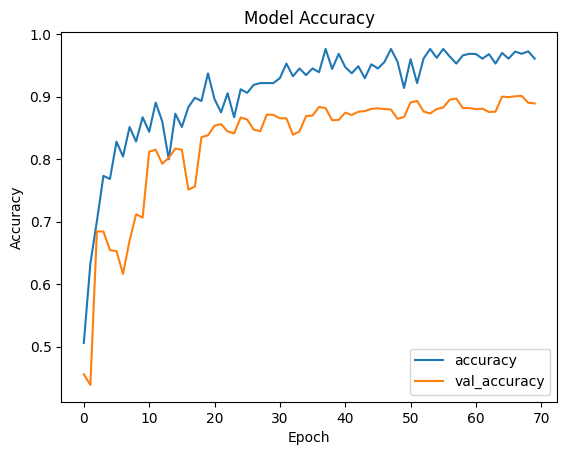

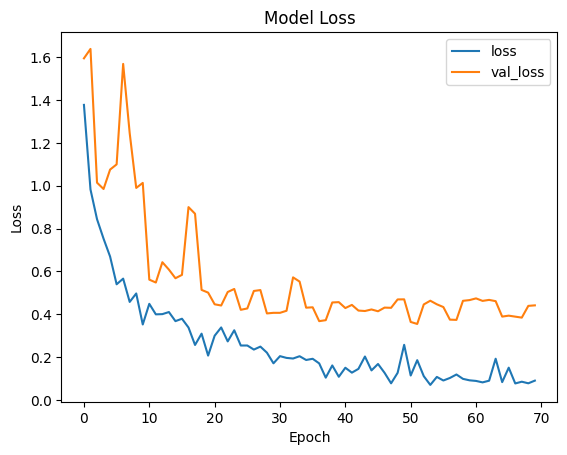

In [6]:
# Accuracy plot
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Model Accuracy')
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Model Loss')
plt.show()